### Import processed data

In [5]:
from Preprocessing import df_imputed, df

## DECISON TREE

In [2]:
df_imputed.isnull().values.any()

np.False_

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, roc_curve, confusion_matrix, 
                           ConfusionMatrixDisplay, classification_report)
from sklearn.preprocessing import LabelEncoder

In [6]:
# Step 1: Encode categorical payment history features
payment_features = ['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']
label_encoders = {}

for feature in payment_features:
    if feature in df.columns:
        le = LabelEncoder()
        df[feature + '_encoded'] = le.fit_transform(df[feature])
        label_encoders[feature] = le
        print(f"{feature} mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Step 2: Encode other categorical features if they exist
categorical_features = ['Employment_Status', 'Credit_Card_Type', 'Location']
for feature in categorical_features:
    if feature in df.columns:
        le = LabelEncoder()
        df[feature + '_encoded'] = le.fit_transform(df[feature])
        label_encoders[feature] = le

Month_1 mapping: {'Late': np.int64(0), 'Missed': np.int64(1), 'On-time': np.int64(2)}
Month_2 mapping: {'Late': np.int64(0), 'Missed': np.int64(1), 'On-time': np.int64(2)}
Month_3 mapping: {'Late': np.int64(0), 'Missed': np.int64(1), 'On-time': np.int64(2)}
Month_4 mapping: {'Late': np.int64(0), 'Missed': np.int64(1), 'On-time': np.int64(2)}
Month_5 mapping: {'Late': np.int64(0), 'Missed': np.int64(1), 'On-time': np.int64(2)}
Month_6 mapping: {'Late': np.int64(0), 'Missed': np.int64(1), 'On-time': np.int64(2)}


In [7]:
# Define features for the model
numerical_features = ['Age', 'Credit_Score', 'Income', 'Credit_Utilization', 
           'Missed_Payments', 'Loan_Balance', 'Debt_to_Income_Ratio', 
           'Account_Tenure']

In [8]:
# Add encoded payment features
encoded_payment_features = [f + '_encoded' for f in payment_features if f in df.columns]
encoded_categorical_features = [f + '_encoded' for f in categorical_features if f in df.columns]

In [9]:
# Combine all features
all_features = numerical_features + encoded_payment_features + encoded_categorical_features

In [10]:
# Step 4: Prepare data for training
X = df[all_features]
y = df['Delinquent_Account']

In [11]:
# Check for any remaining non-numeric data
print("Data types after encoding:")
print(X.dtypes)
print("\nAny non-numeric columns:", X.select_dtypes(include=['object']).columns.tolist())

Data types after encoding:
Age                            int64
Credit_Score                 float64
Income                       float64
Credit_Utilization           float64
Missed_Payments                int64
Loan_Balance                 float64
Debt_to_Income_Ratio         float64
Account_Tenure                 int64
Month_1_encoded                int64
Month_2_encoded                int64
Month_3_encoded                int64
Month_4_encoded                int64
Month_5_encoded                int64
Month_6_encoded                int64
Employment_Status_encoded      int64
Credit_Card_Type_encoded       int64
Location_encoded               int64
dtype: object

Any non-numeric columns: []


In [12]:
# Step 5: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
# Step 6: Train the Decision Tree
dt_classifier = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42
)

In [14]:
# This should now work without the string conversion error
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=10,
                       min_samples_split=20, random_state=42)

In [15]:
# Step 7: Make predictions and evaluate
y_pred = dt_classifier.predict(X_test)
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]

# Model Performance

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Calculate all metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
auc = roc_auc_score(y_test, y_pred_proba)

In [18]:
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
print(f"AUC-ROC:   {auc:.4f} ({auc*100:.2f}%)")


Accuracy:  0.8200 (82.00%)
Precision: 0.0000 (0.00%)
Recall:    0.0000 (0.00%)
F1-Score:  0.0000 (0.00%)
AUC-ROC:   0.4375 (43.75%)


In [19]:
print("\n" + "="*50)
print("DETAILED CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_test, y_pred, 
                          target_names=['Not Delinquent', 'Delinquent']))


DETAILED CLASSIFICATION REPORT
                precision    recall  f1-score   support

Not Delinquent       0.84      0.98      0.90        84
    Delinquent       0.00      0.00      0.00        16

      accuracy                           0.82       100
     macro avg       0.42      0.49      0.45       100
  weighted avg       0.70      0.82      0.76       100



In [20]:
# ===== CONFUSION MATRIX =====
print("="*50)
print("CONFUSION MATRIX")
print("="*50)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nConfusion Matrix Breakdown:")
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives:  {tn} (Correctly predicted Not Delinquent)")
print(f"False Positives: {fp} (Incorrectly predicted Delinquent)")
print(f"False Negatives: {fn} (Incorrectly predicted Not Delinquent)")
print(f"True Positives:  {tp} (Correctly predicted Delinquent)")

CONFUSION MATRIX
[[82  2]
 [16  0]]

Confusion Matrix Breakdown:
True Negatives:  82 (Correctly predicted Not Delinquent)
False Positives: 2 (Incorrectly predicted Delinquent)
False Negatives: 16 (Incorrectly predicted Not Delinquent)
True Positives:  0 (Correctly predicted Delinquent)


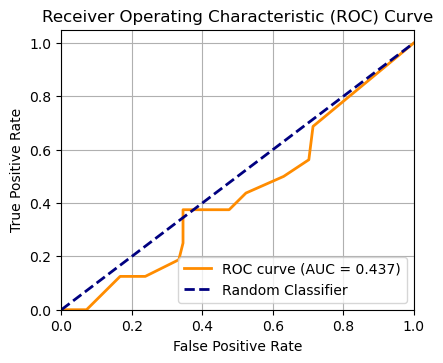

In [47]:
# ===== VISUALIZATIONS =====

# 1. ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)

Text(0.5, 225.12222222222223, 'Predicted Label')

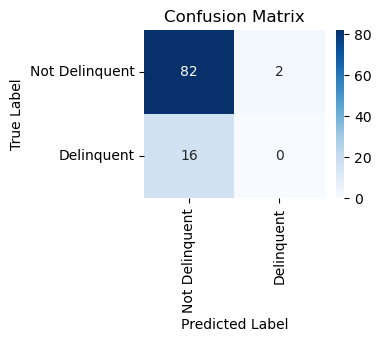

In [48]:
# 2. Confusion Matrix Heatmap
plt.subplot(2, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Delinquent', 'Delinquent'],
            yticklabels=['Not Delinquent', 'Delinquent'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

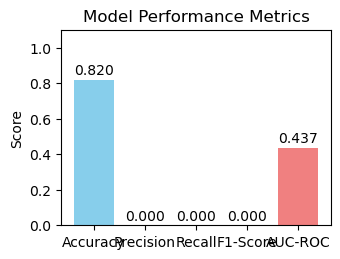

In [50]:
# 4. Metrics Bar Chart
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'Score': [accuracy, precision, recall, f1, auc]
})
plt.subplot(2, 2, 4)
bars = plt.bar(metrics_df['Metric'], metrics_df['Score'], 
               color=['skyblue', 'lightgreen', 'orange', 'pink', 'lightcoral'])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1.1)
for bar, score in zip(bars, metrics_df['Score']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

I evaluated my decision tree model using a comprehensive set of metrics to understand its performance from multiple angles. I calculated accuracy (82.00%), precision (0.00%), recall (0.00%), F1-score (0.00%), and AUC-ROC (43.75%). While the accuracy initially appears decent at 82%, the other metrics reveal a critical flaw in my model - the 0% precision and recall indicate that my model is failing to identify any delinquent customers at all, essentially classifying everyone as "not delinquent". This suggests my model has learned to simply predict the majority class, which explains the high accuracy but complete failure in detecting the minority class (delinquent customers). The AUC-ROC of 43.75% is actually worse than random chance (50%), confirming that my model lacks discriminative ability. This pattern typically indicates class imbalance issues where delinquent customers represent a small percentage of the dataset, causing the model to optimize for overall accuracy rather than balanced performance. 

To address these performance issues and reduce bias, I plan to implement class balancing techniques such as SMOTE (Synthetic Minority Oversampling Technique) or adjusting class weights to ensure the model learns to identify delinquent customers properly. From an ethical standpoint, I recognize that making predictions about customer financial behavior carries significant responsibilities - false negatives (missing actual delinquent customers) could lead to poor risk management, while false positives (incorrectly flagging customers as delinquent) could result in unfair denial of credit services. I will implement bias detection measures by analyzing model performance across different demographic groups to ensure fair treatment, regularly audit the model for discriminatory patterns, and establish clear governance frameworks for model decisions. Additionally, I plan to provide transparent explanations for all predictions and maintain human oversight in the decision-making process to ensure ethical use of the predictive model in financial services. 
